<a href="https://colab.research.google.com/github/oliviasteeed/Week2_DataPreprocessing/blob/main/A2W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
!python3 -m pip --version

pip 24.2 from /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip (python 3.12)


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install librosa

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os

from glob import glob

import librosa
import IPython.display as ipd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1

Matplotlib is building the font cache; this may take a moment.


# Code

In [3]:
audio_files = glob('/Users/oliviasteed/Desktop/IAT 360/data/Audio Data/*/*.wav')


#Playing an audio file using IPython.display
ipd.Audio(audio_files[0])



Examining Dataset

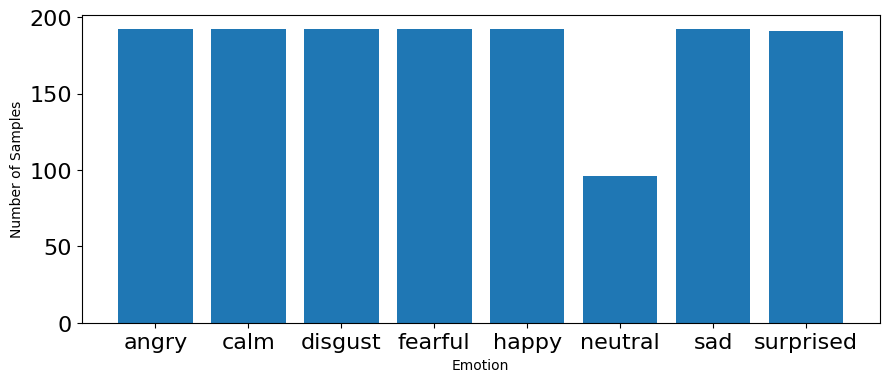

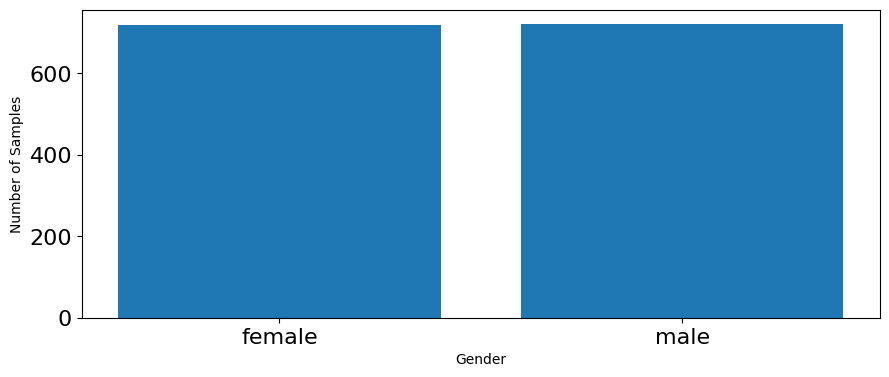

In [32]:
#Analyze the data in terms of gender balance and emotional category balance,
#show in a graph or visual representation and comment 1-2 sentences on the possible impact of them both.


#get list of emotions
emotions_dict ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#load data and extract emotion names
import os, glob



def load_data():
    X, y = [],[]
    count = 0
    femaleCount = 0
    maleCount = 0
    for file in glob.glob("/Users/oliviasteed/Desktop/IAT 360/data/Audio Data/*/*.wav"):
        file_name = os.path.basename(file)

# odd is male, even is female
        test = int(file_name.split("-")[6].split('.')[0])
        if test % 2 == 0:
          femaleCount += 1
        else:
          maleCount += 1


        emotion = emotions_dict[file_name.split("-")[2]]
        y.append(emotion)
        count += 1

        # '\r' + end='' results in printing over same line
        # print('\r' + f' Processed {count}/{1440} audio samples', end = ' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y), femaleCount, maleCount

#read emotion names for entire dataset
features, emotions, female, male = load_data()

#make visualization of emotions
plt.figure(figsize = (35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(emotions, return_counts=True)
plt.bar(x = range(8), height = count)
plt.xticks(ticks = range(8), labels = [emotion for emotion in emotion_list],fontsize = 10)
plt.xlabel('Emotion')
plt.tick_params(labelsize =16)
plt.ylabel('Number of Samples')
plt.show()


#make visualization of gender balance
plt.figure(figsize = (35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
# emotion_list, count = np.unique(emotions, return_counts=True)
gender_dist = [female, male]
plt.bar(x = range(2), height = gender_dist)
plt.xticks(ticks = range(2), labels = ['female', 'male'],fontsize = 10)
plt.xlabel('Gender')
plt.tick_params(labelsize =16)
plt.ylabel('Number of Samples')
plt.show()

